In [1]:
from tbh import runner_tools as rt 
from tbh import plotting as pl

from importlib import reload
reload(rt);
reload(pl);

import tbh.interventions as ints

In [2]:
from tbh import model as tbm 
reload(tbm)

params, priors, tv_params = rt.get_parameters_and_priors()
model_config = rt.DEFAULT_MODEL_CONFIG
model = tbm.get_tb_model(model_config, tv_params)

In [3]:
sc1_scr_programs = [
    ints.example_scr_program
]
model_1 = tbm.get_tb_model(model_config, tv_params, sc1_scr_programs)

In [4]:
ow_params = {
    "raw_transmission_rate": 10.,
}

model.run(params | ow_params)
df = model.get_derived_outputs_df()

<Axes: >

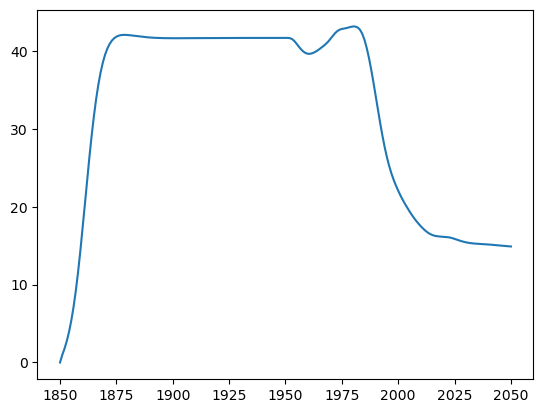

In [7]:
df['tst_posXage_10_perc'].plot()

In [ ]:
df['viable_tbi_prevalence_perc'].plot()

In [ ]:
model_1.run(params| ow_params)
df1 = model_1.get_derived_outputs_df()

# model_2.run(params| ow_params)
# df2 = model_2.get_derived_outputs_df()

# model_3.run(params| ow_params)
# df3 = model_3.get_derived_outputs_df()

# model_4.run(params| ow_params)
# df4 = model_4.get_derived_outputs_df()


In [ ]:
df['viable_tbi_prevalence_perc']

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

df['viable_tbi_prevalence_perc'].loc[2018:2030].plot(label="baselines")
df1['viable_tbi_prevalence_perc'].loc[2018:2030].plot(label="CXR")
# df2['tb_incidence_per100k'].loc[2018:2030].plot(label="CXR + TPT")
# df3['tb_incidence_per100k'].loc[2018:2030].plot(label="CXR TPT Xpert")

# df4['tb_incidence_per100k'].loc[2018:2030].plot(label="CXR + Xpert")

ax.legend()


## Metropolis calibration

In [ ]:
from estival.model import BayesianCompartmentalModel
from estival import targets as est

In [ ]:
import pandas as pd
targets = [
    est.NormalTarget("notifications", pd.Series([100], [2020]),stdev=20.)
]
bcm = BayesianCompartmentalModel(model, params, priors, targets)

In [ ]:
import multiprocessing as mp
mp.set_start_method("spawn")  # previously "forkserver"

import pytensor
pytensor.config.cxx = '/usr/bin/clang++'

In [ ]:
idata = rt.run_metropolis_calibration(bcm, draws=100, tune=50, chains=2, cores=1)